In [1]:
import datetime
from dateutil.relativedelta import relativedelta
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH="../DATA/RAW/"

### Validate Sea Level Dataset

In [3]:
df=pd.read_csv(PATH+"Sea level.csv")

In [4]:
# Check Missing Value
df.isna().sum()

date              0
Sea level (cm)    0
dtype: int64

In [27]:
df.index=pd.to_datetime(df["date"], format='%Y-%m-%d %H.%M.%S')
df=df["Sea level (cm)"]

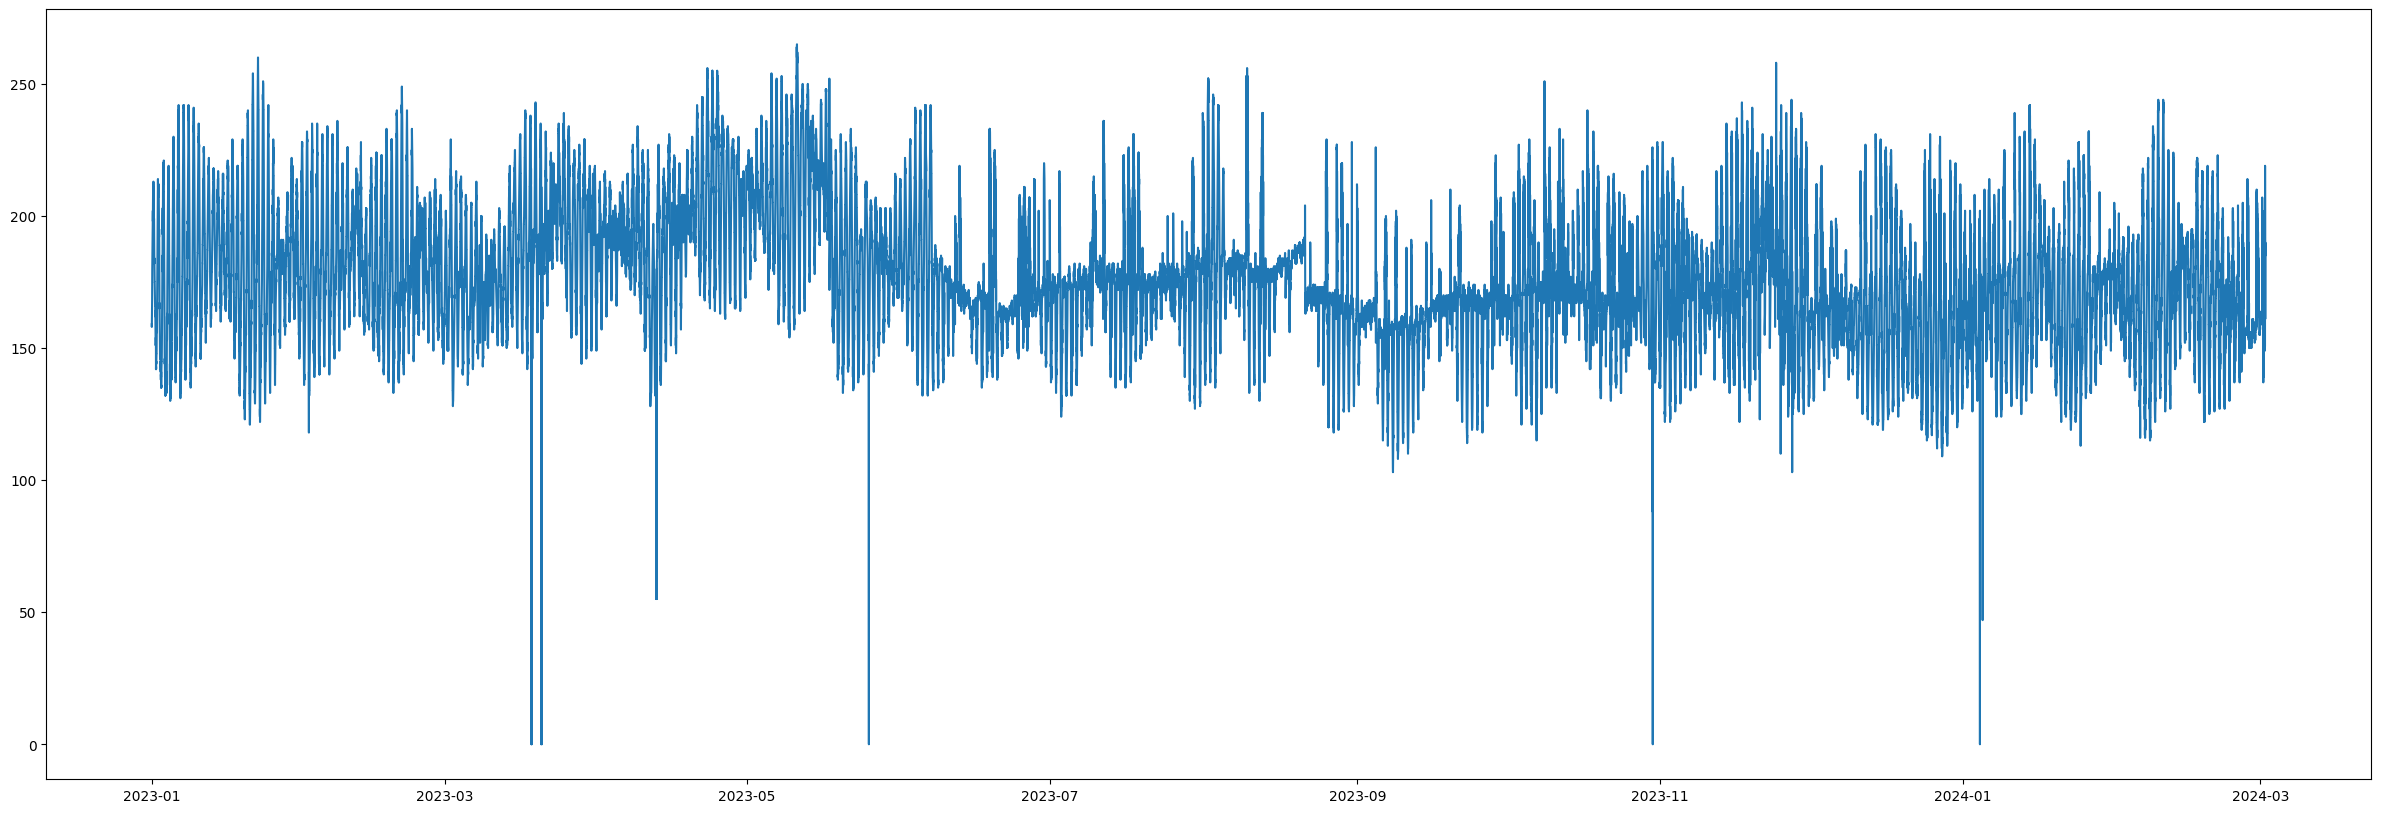

In [34]:
# Check any fluctuation
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(df)

In [48]:
# Missing value's identifies ad 0, changing 0 to appropriate value
df[df==0]=np.nan
df=df.interpolate()

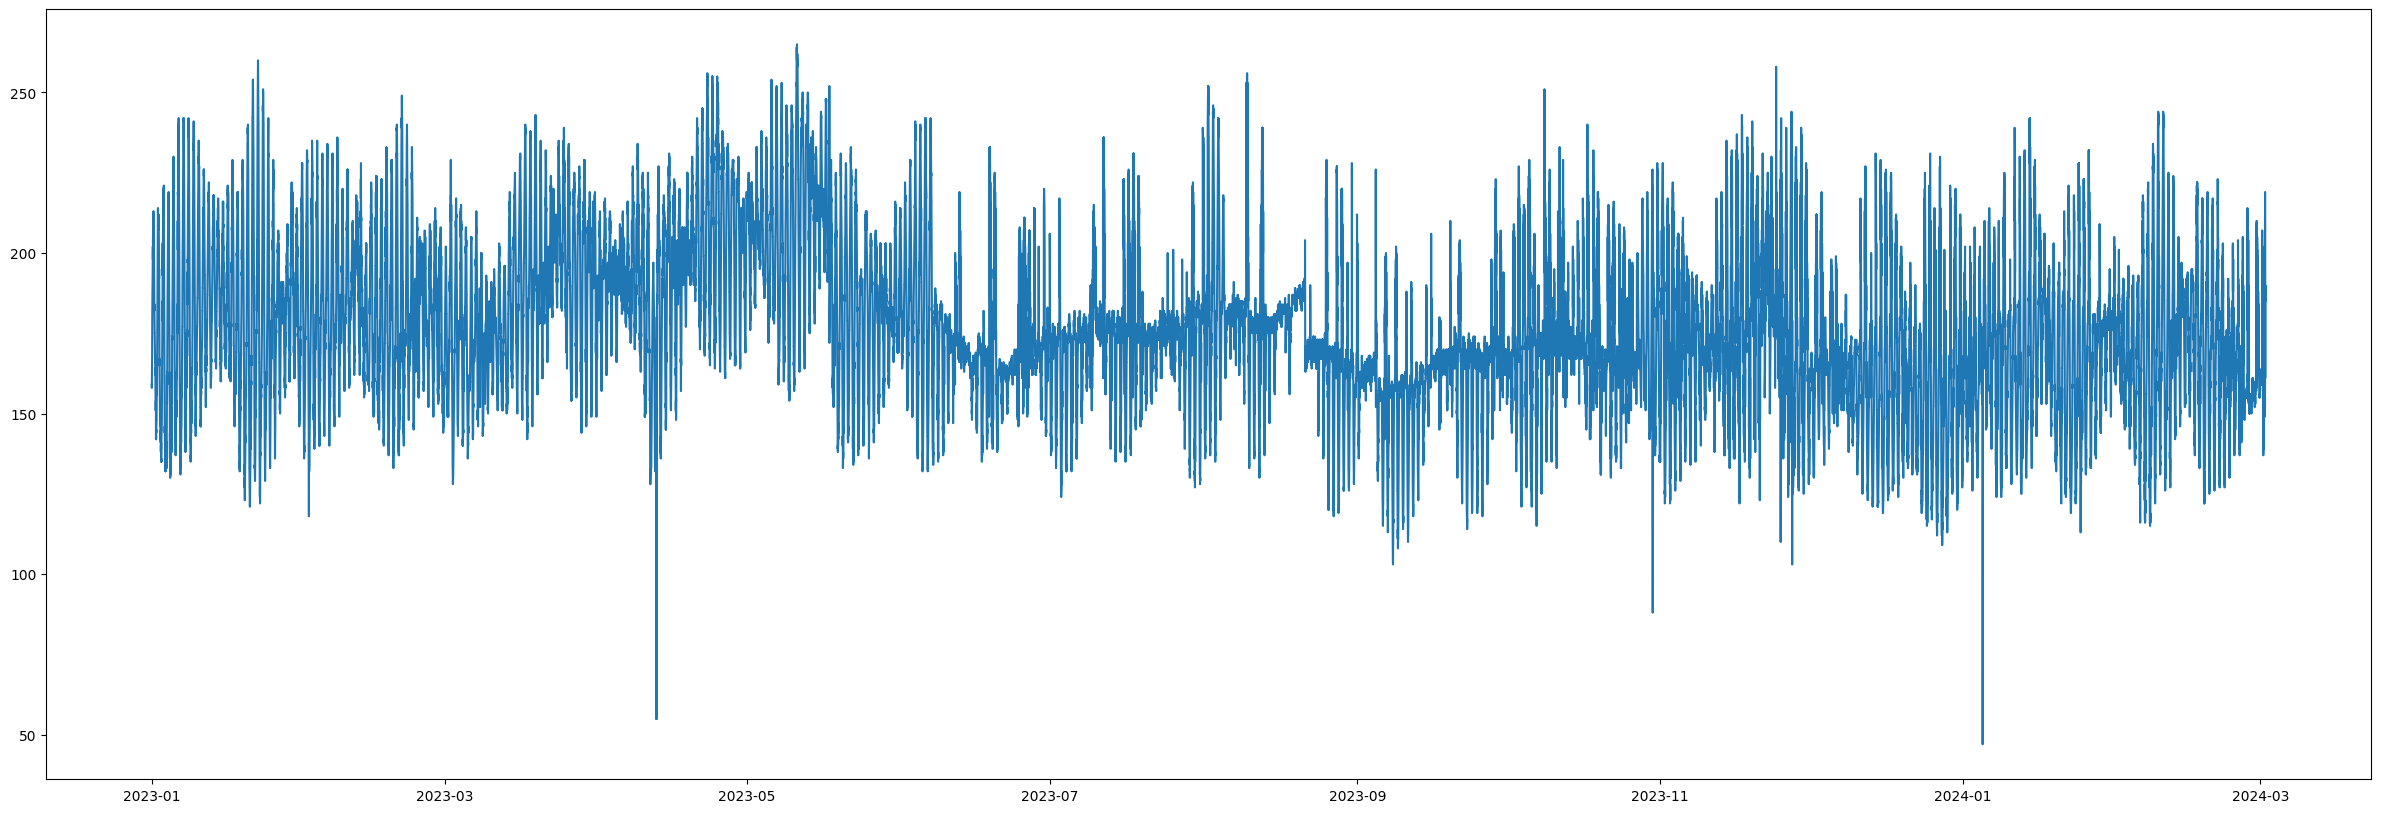

In [50]:
# Check after handling
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(df)

### Change Sea Level Dataset Into Daily Data

In [79]:
temp=[]
Starting_Date=df.index[0].date()
Ending_Date=df.index[-1].date()

current_date = Starting_Date
while current_date <= Ending_Date:
    temp.append([current_date, np.mean(df.loc[str(current_date)].values)])
    current_date += relativedelta(days=1)
temp=np.array(temp)
df_daily=pd.DataFrame(temp[:,1], index=temp[:,0], columns=["Sea level (cm)"])

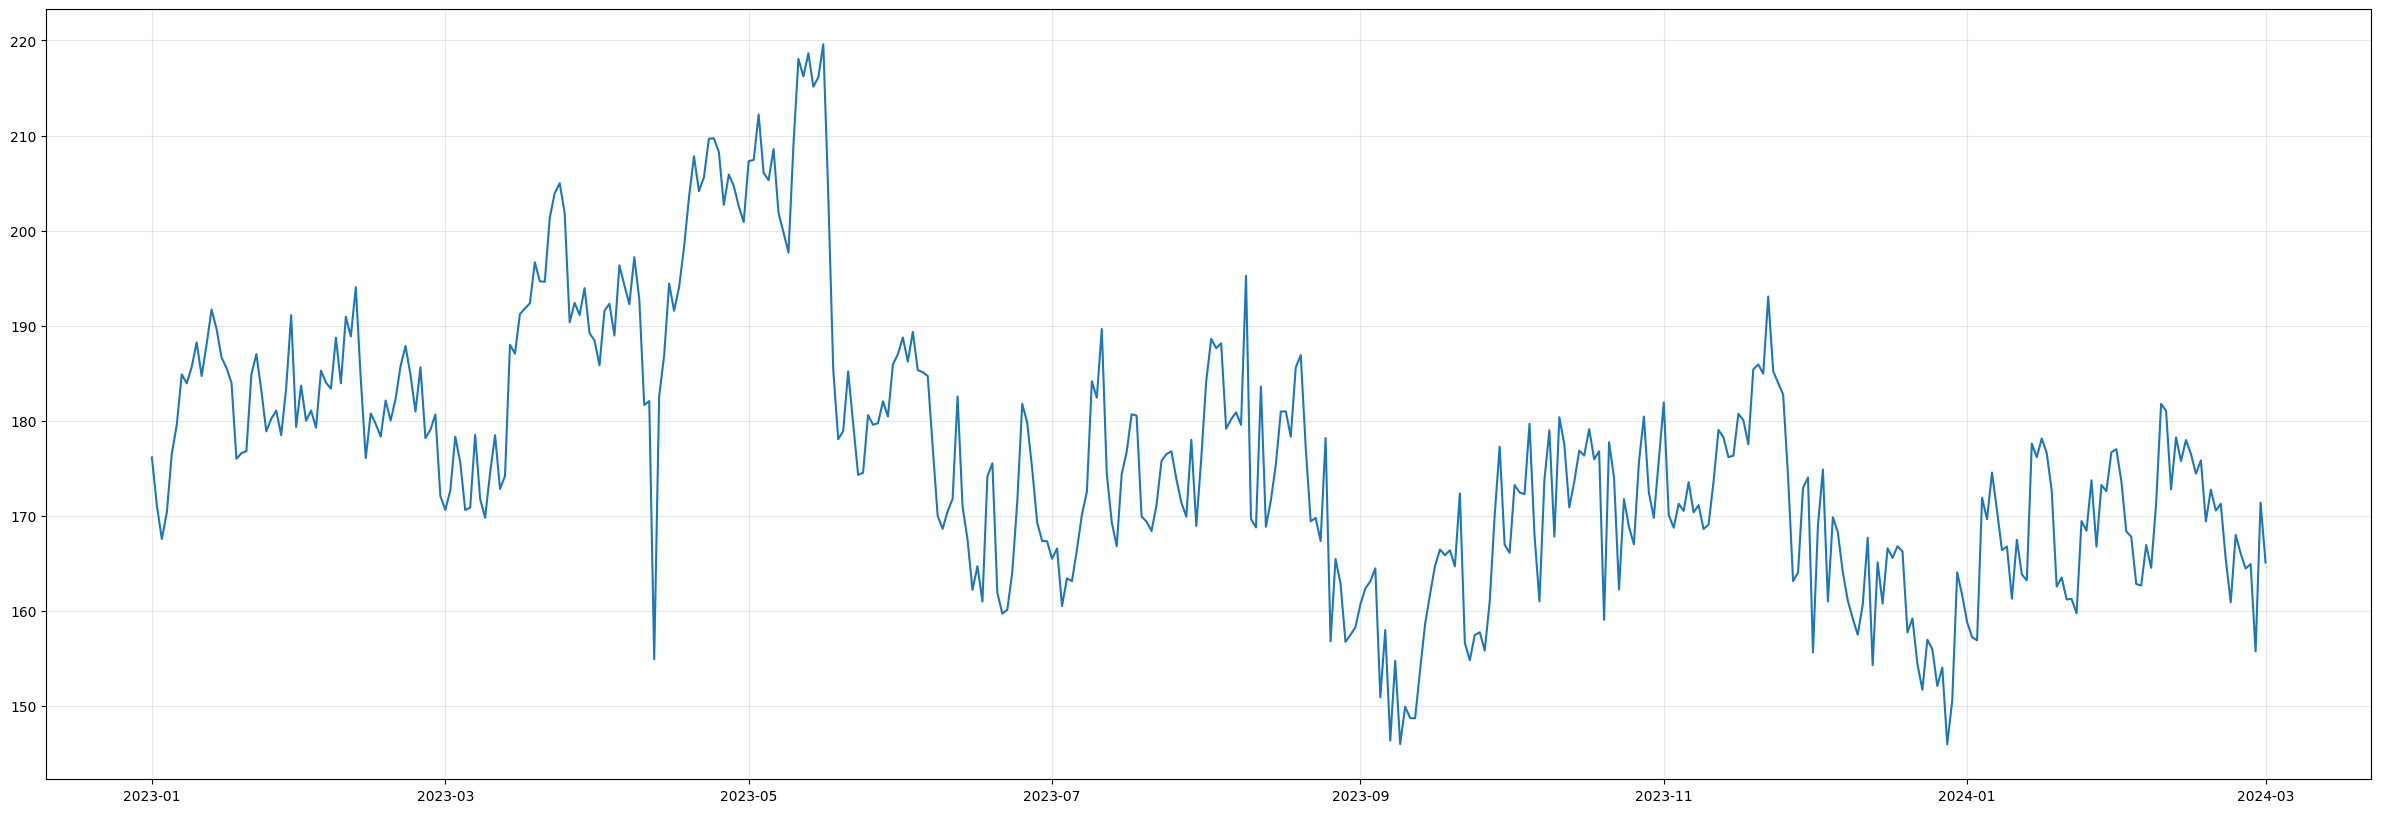

In [83]:
# Check after handling
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(df_daily)
ax.grid("on", alpha=0.3)

In [84]:
df_daily.to_csv("../DATA/Sea_Level_Daily.csv")

### Choosing `Laporan Iklim` Independent Variables

1. Average wind speed (https://nhess.copernicus.org/articles/22/813/2022/) (m/s) `ff_avg`
2. Average temperature (https://www.sciencedirect.com/science/article/pii/S1018363921001136) (°C) `Tavg`
3. Rain intensity (https://www.sciencedirect.com/science/article/abs/pii/S0048969717328814 [Berbayar, cari yang gratis]) (mm) `RR`


Note:
* 8888: Data wasn't measured
* 9999: No data

In [4]:
df=pd.read_csv(PATH+"Laporan Iklim/!Merged.csv")
df.index=pd.to_datetime(df["Tanggal"], format='%d-%m-%Y')
df=df[["Tavg", "RR", "ff_avg"]]

In [5]:
# Check Missing data
df.isin([9999, 8888]).sum()

Tavg       0
RR        27
ff_avg     0
dtype: int64

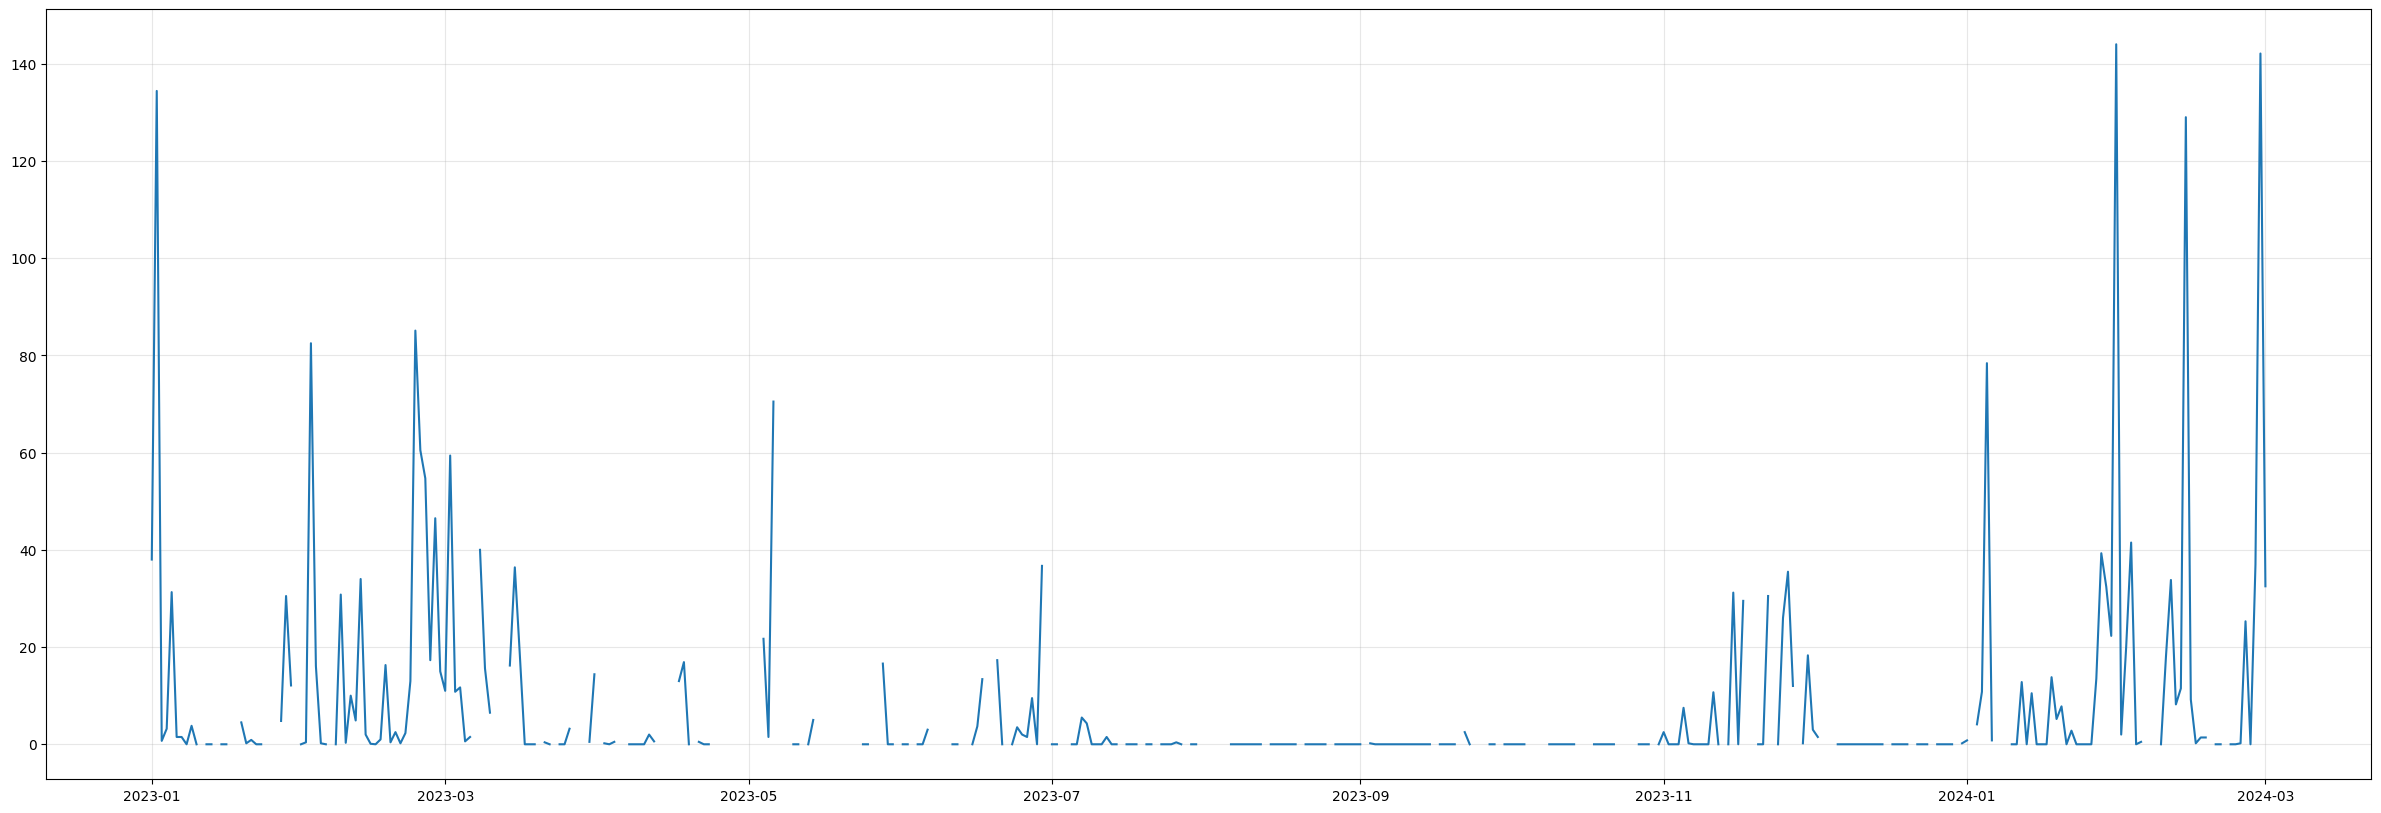

In [6]:
# Plot with missing value
df[(df == 9999) | (df == 8888)] = np.nan

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(df["RR"])
ax.grid("on", alpha=0.3)

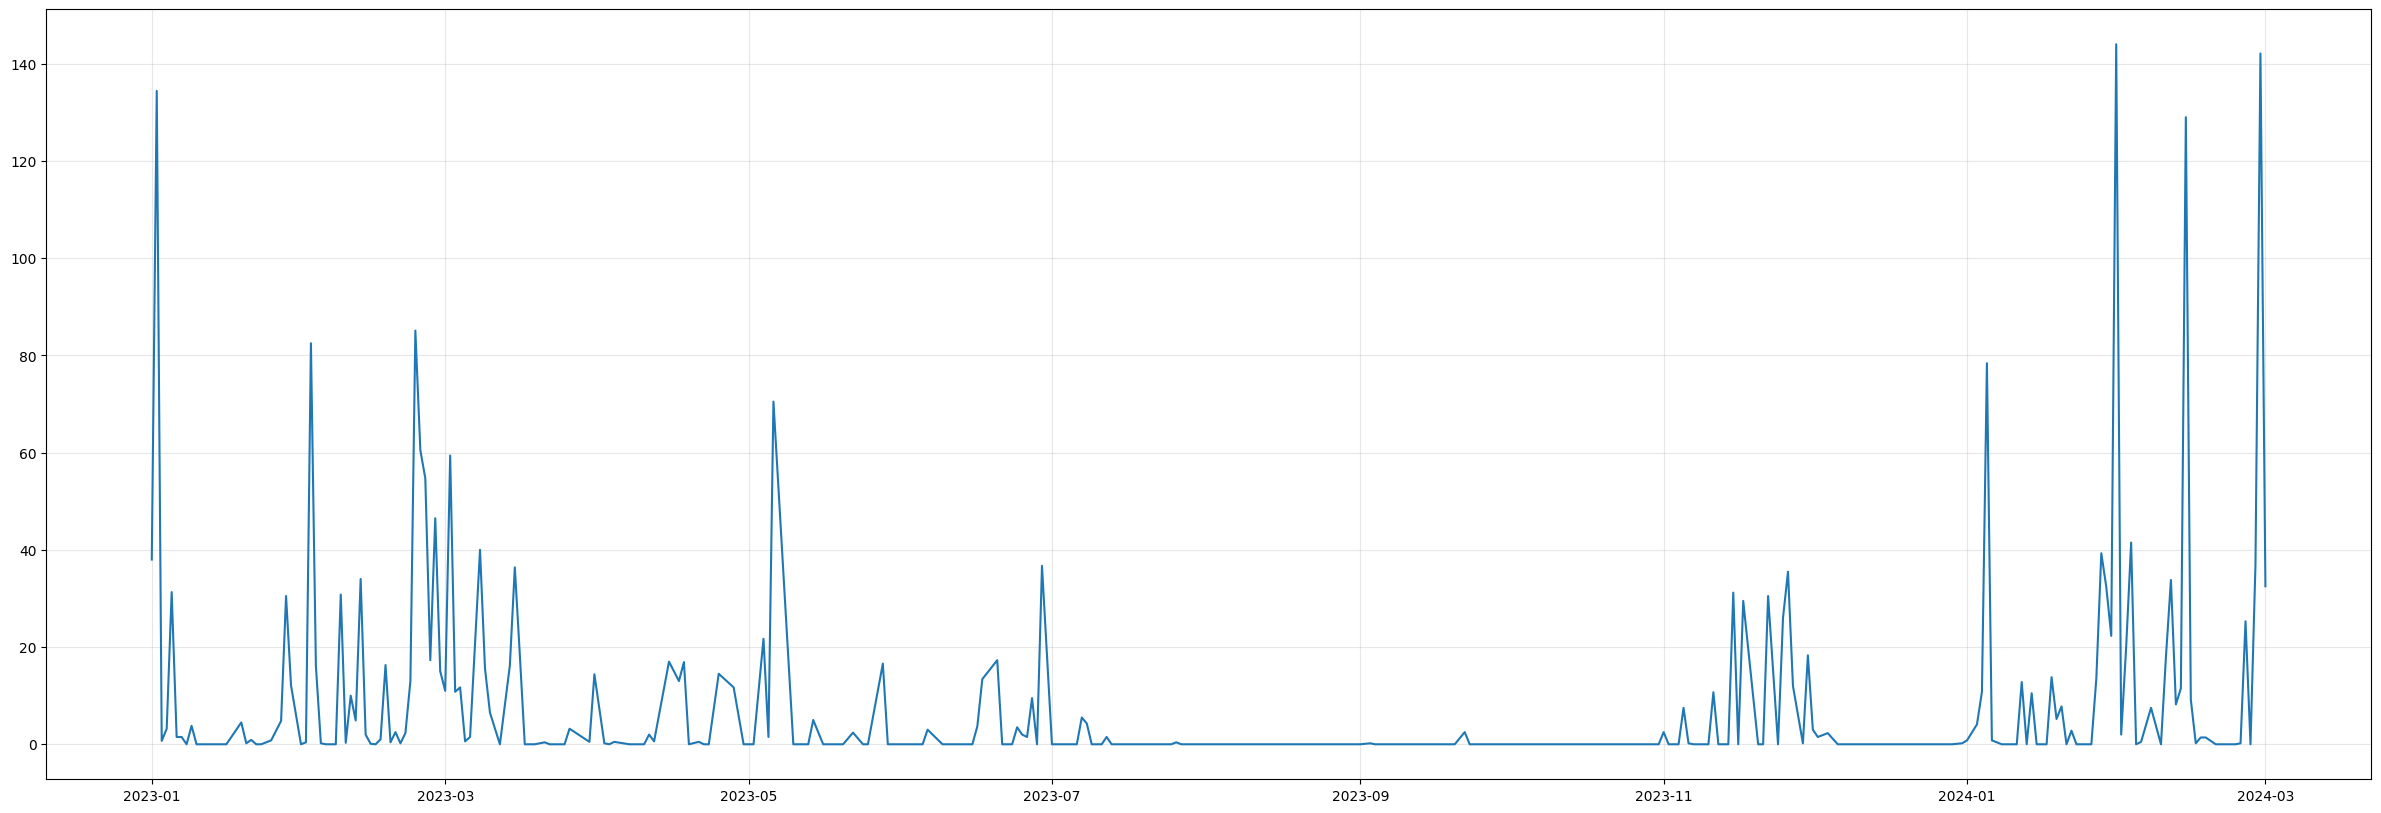

In [7]:
# Interpolate then plot

df=df.interpolate()
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(df["RR"])
ax.grid("on", alpha=0.3)

In [169]:
df.to_csv("../DATA/Laporan Iklim.csv")

### Merged Sea Level And Laporan Iklim

In [177]:
pd.concat((df, df_daily), axis=1).to_csv("../DATA/!Final.csv")

C:\Users\Rhey\AppData\Local\Temp\ipykernel_20844\2269957709.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  pd.concat((df, df_daily), axis=1).to_csv("../DATA/!Final.csv")
